## Import Kaggle - Original Notebook was in kaggle

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bbc-news-summary:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F24984%2F32267%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240621%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240621T101433Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7b6aec2b40b37d895d0822b34965c579ce3c8967b0dcd5fe81ea276b768e5c1b377a41addf5424617483480fb4786cc6d763ac55e262c595b7d4b72aa80b4614e96cb145eeff6dcaf4dbb784a9333a0d7910ff6bfc70006c18dfe05d0fb654484ce9056b39b0842f071418eb460c91b0a2ec19f185819f46c5f9d6babc234ad68c0ad81c413cc3848d36217394cf15e0e754f50ca8dc625f4330a97a91a012cc0be726a92277149bd0d9c453bd8f0efd4e91be1ba82928d7662802bbd4e5d8bedc9fcf261fe804cc489e7ddf3fc3ad8eb06662991bbee2db0396e5ce88c2be57f8ac0c2938f5219b7de89d8a77b2f4bbc1e15ad7d77a259ce7ca6200c55017b5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 9342346 bytes downloaded
Downloaded and uncompressed: bbc-news-summary
Data source import complete.


Some Pip Installs required *

In [2]:
!pip install bert-extractive-summarizer
!pip install contractions
!pip install evaluate rouge_score
!pip install gradio
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.6 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=5e01900f287391e1bcfabe30e7f15e4ab1c63442fb86c7f08622ad3a13cab5a0
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/46106

Imports

In [3]:
import pandas as pd
import os
import numpy as np
from spacy.tokenizer import Tokenizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.manifold import TSNE
# from rouge import Rouge
import transformers
from summarizer import Summarizer, TransformerSummarizer
import contractions
from sklearn.model_selection import KFold
from transformers import BigBirdPegasusForConditionalGeneration, PegasusTokenizer, Trainer, TrainingArguments
import torch
from datasets import Dataset
import gradio as gr
from transformers import PegasusForConditionalGeneration, TrainingArguments, AutoTokenizer, AutoModelForSeq2SeqLM
import evaluate
rouge = evaluate.load('rouge')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# just to see the directory structure.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/entertainment/384.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/entertainment/134.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/entertainment/293.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/entertainment/001.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/entertainment/211.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/entertainment/231.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/entertainment/335.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/entertainment/230.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/entertainment/184.txt
/kaggle/input/bbc-news-summary/bbc news 

### Create a Single Dataframe from all 5 categories of news.

In [34]:
# We need to create the dataframe and concatenate later.
def make_dataframes_from_file(text,summary):
    articles = {file for file in os.listdir(text) if file.endswith('.txt')}
    summaries = {file for file in os.listdir(summary) if file.endswith('.txt')}

    common_files = articles.intersection(summaries)
    # so that it matches the same files
    if len(common_files) != len(articles) or len(common_files) != len(summaries):
        raise ValueError("Source and target directories do not contain the same files.")

    records = []
    for filename in common_files:
        article_file_path = os.path.join(text, filename)
        summary_file_path = os.path.join(summary, filename)
        with open(article_file_path, 'r', encoding='latin-1') as article_file:
            article_text = article_file.read()

        with open(summary_file_path, 'r', encoding='latin-1') as summary_file:
            summary_text = summary_file.read()

        records.append({'article': article_text, 'summary': summary_text})
    df = pd.DataFrame.from_records(records)

    return df

Combine them

In [35]:
""" Loop thru the categories"""
categories = ['business', 'entertainment', "politics", "sport", "tech"]

base_article_path = "/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/"
base_summary_path = "/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/"

# Create dfs for all the categories (5)
dfs = [make_dataframes_from_file(f"{base_article_path}{category}", f"{base_summary_path}{category}") for category in categories]

# Concatenate all dfs
df = pd.concat(dfs, ignore_index=True)
df.head(5)

,article,summary
0,Libya takes $1bn in unfrozen funds\n\nLibya ha...,Libya has withdrawn $1bn in assets from the US...
1,Salary scandal in Cameroon\n\nCameroon says wi...,The prime minister's office said the alleged f...
2,Jarvis sells Tube stake to Spain\n\nShares in ...,Shares in engineering group Jarvis have soared...
3,Verizon 'seals takeover of MCI'\n\nVerizon has...,Verizon has won a takeover battle for US phone...
4,Jobs growth still slow in the US\n\nThe US cre...,The job gains mean that President Bush can cel...


In [6]:
#check specific words
keyword = 'wal-mart'
filtered_df = df[df['summary'].str.contains(keyword, case=False)]
filtered_df

,article,summary
16,Wal-Mart to pay $14m in gun suit\n\nThe world'...,"""Although Wal-Mart has suspended gun sales in ..."
107,Wal-Mart fights back at accusers\n\nTwo big US...,"Meanwhile, drugs group Eli Lilly is planning a..."
250,Mixed Christmas for US retailers\n\nUS retaile...,Upscale department store Nordstrom said same s...
276,US consumer confidence up\n\nConsumers' confid...,"Wal-Mart, the largest US retailer, has said it..."
319,Winn-Dixie files for bankruptcy\n\nUS supermar...,"Winn-Dixie, once among the most profitable of ..."
472,Macy's owner buys rival for $11bn\n\nUS retail...,US retail giant Federated Department Stores is...
606,Wal-Mart is sued over rude lyrics\n\nThe paren...,Wal-Mart said it was investigating the claims ...


In [7]:
df.summary

0       Libya has withdrawn $1bn in assets from the US...
1       The prime minister's office said the alleged f...
2       Shares in engineering group Jarvis have soared...
3       Verizon has won a takeover battle for US phone...
4       The job gains mean that President Bush can cel...
                              ...                        
2220    Mr Fisher said that while he would accept any ...
2221    The behaviour of online shoppers was also chan...
2222    Fixed line phones will also start to get much ...
2223    If a user clicks the AutoLink feature in the G...
2224    The number of Europeans with broadband has exp...
Name: summary, Length: 2225, dtype: object

In [8]:
df.head()

,article,summary
0,Libya takes $1bn in unfrozen funds\n\nLibya ha...,Libya has withdrawn $1bn in assets from the US...
1,Salary scandal in Cameroon\n\nCameroon says wi...,The prime minister's office said the alleged f...
2,Jarvis sells Tube stake to Spain\n\nShares in ...,Shares in engineering group Jarvis have soared...
3,Verizon 'seals takeover of MCI'\n\nVerizon has...,Verizon has won a takeover battle for US phone...
4,Jobs growth still slow in the US\n\nThe US cre...,The job gains mean that President Bush can cel...


Some Cleaning with contractions and newlines spotted.

In [36]:
df=df.dropna()
def remove_newlines(text):
    return text.replace('\n', ' ')

df['article'] = df['article'].apply(remove_newlines)
df['summary'] = df['summary'].apply(remove_newlines)

def fix_contractions(text):
    return contractions.fix(text)

df['article'] = df['article'].apply(fix_contractions)
df['summary'] = df['summary'].apply(fix_contractions)

Train test val split

In [37]:

X = df['article']
Y = df['summary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_df = pd.DataFrame({'article': X_train, 'summary': Y_train})
test_df = pd.DataFrame({'article': X_test, 'summary': Y_test})

# val set
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

In [11]:
train_df.shape

(1602, 2)

In [12]:
test_df.shape

(445, 2)

In [13]:
train_df.describe()

,article_text,summary_text
count,1602,1602
unique,1549,1524
top,Bortolami predicts dour contest Italy skipper...,An attachment in the e-mail contains the virus...
freq,2,2


In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Remove punctuations, stop words, tokenize, etc.

In [38]:
# clean the data, remove common things in nlp.
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    tokens = word_tokenize(text)

    tokens = [token.lower() for token in tokens]
    # punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

train_df['article'] = train_df['article'].apply(preprocess_text)
train_df['summary'] = train_df['summary'].apply(preprocess_text)

train_df['article'].head()


0       libya takes 1bn unfrozen funds libya withdrawn...
1911    china 'blocks google news site china accused b...
1902    virgin radio offers 3g broadcast uk broadcaste...
1690    melzer shocks agassi san jose second seed andr...
601     elvis set top uk singles chart rock 'n roll le...
Name: article, dtype: object

In [39]:
train_df.head()

,article,summary
0,libya takes 1bn unfrozen funds libya withdrawn...,libya withdrawn 1bn assets us assets previousl...
1911,china 'blocks google news site china accused b...,`` china censoring google news force internet ...
1902,virgin radio offers 3g broadcast uk broadcaste...,james cridland head new media virgin radio sai...
1690,melzer shocks agassi san jose second seed andr...,second seed andre agassi suffered comprehensiv...
601,elvis set top uk singles chart rock 'n roll le...,record make top spot elvis 19th uk number one....


Some Stats

In [17]:
train_df['article_length'] = train_df['articles'].apply(lambda x: len(x.split()))
train_df['summary_length'] = train_df['summaries'].apply(lambda x: len(x.split()))

print("Biggest length of articles:")
print(train_df['article_length'].max())

print("Average length of summaries:")
print(train_df['summary_length'].mean())

Biggest length of articles:
2258
Average length of summaries:
103.57178526841449


## Histogram of article and summary length

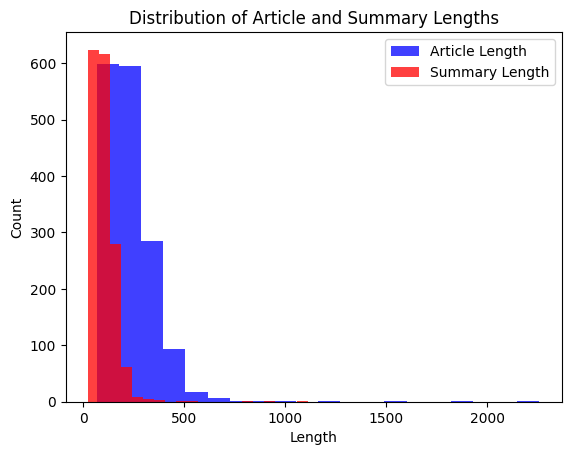

In [18]:
plt.hist(train_df['article_length'], bins=20, alpha=0.75, color='b', label='Article Length')
plt.hist(train_df['summary_length'], bins=20, alpha=0.75, color='r', label='Summary Length')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Article and Summary Lengths')
plt.legend()
plt.show()


## Find the most used words for a wordcloud later


Top 20 words by frequency:
             word  frequency
22822        said       7255
17682          mr       3005
28933        year       2309
19527      people       2045
18095         new       1978
26390        time       1322
28764       world       1201
11988  government       1160
27092          uk       1115
28937       years       1003
3841         best        974
14809        just        957
16358        make        945
26477        told        911
10641        film        890
15792        like        879
11455        game        871
17786       music        839
15275      labour        804
1             000        804


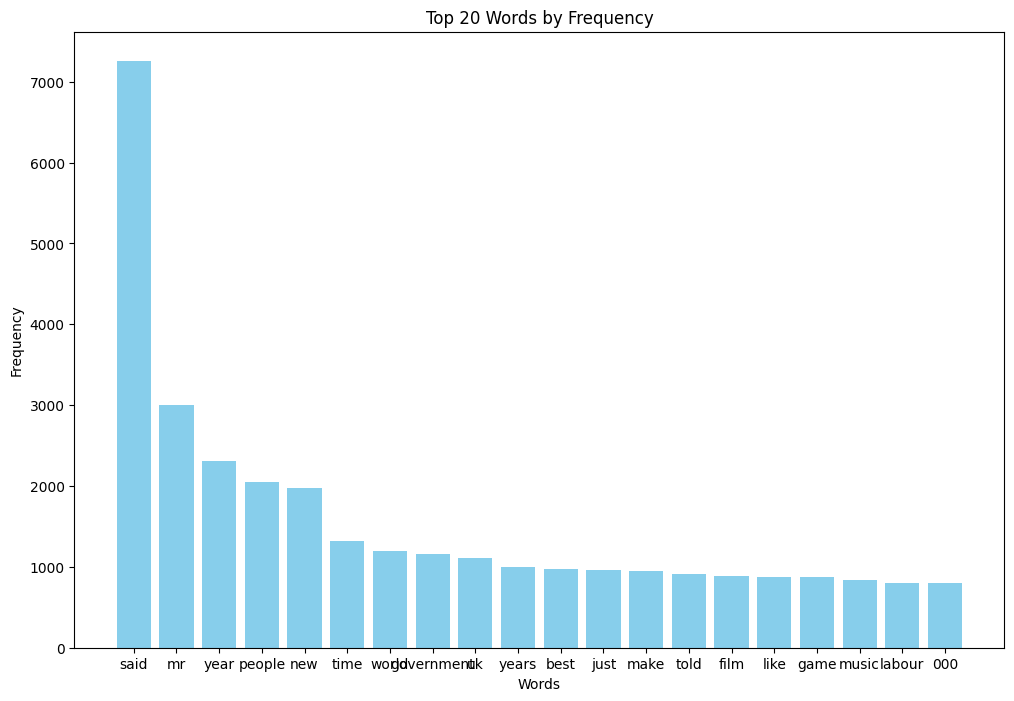

In [19]:
vectorizer = CountVectorizer(stop_words='english')

# transform the articles for counting
X = vectorizer.fit_transform(df['article'])
# sum
word_frequencies = X.sum(axis=0)

word_feats = vectorizer.get_feature_names_out()

# Create a DataFrame to store frequencies
word_freq_df = pd.DataFrame(word_feats, columns=['word'])

word_freq_df['frequency'] = word_frequencies.tolist()[0]

# Sort words by frequency
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Display top 10 words by frequency
top_words = word_freq_df.head(20)
print("Top 20 words by frequency:")
print(top_words)

# Plotting top 20 words by frequency
plt.figure(figsize=(12, 8))
plt.bar(top_words['word'], top_words['frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words by Frequency')
plt.show()

Finding cosine similarity between each article and summary

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Example DataFrame df with 'article_text' and 'summary_text' columns
# Assuming df['article_text'] and df['summary_text'] contain preprocessed text data

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform article_text and summary_text
X = vectorizer.fit_transform(df['article'])
Y = vectorizer.transform(df['summary'])

# Calculate cosine similarity between article_text and summary_text
cosine_similarities = cosine_similarity(X, Y)

# Example: Print cosine similarity score between the first article and its corresponding summary
print(f"Cosine similarity between first article and its summary: {cosine_similarities[1][1]}")


Cosine similarity between first article and its summary: 0.8014235502202378


## This is computational heavy so won't work, will figure another way

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities, cmap='coolwarm', vmin=0, vmax=1,
            xticklabels=df['summary'], yticklabels=df['article'],
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Cosine Similarity between Articles and Summaries')
plt.xlabel('Summary Text')
plt.ylabel('Article Text')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Exception ignored in: <function _xla_gc_callback at 0x7fcb20945480>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Error in callback <function flush_figures at 0x7fcc8d223a30> (for post_execute):


KeyboardInterrupt: 

In [ ]:
cv= CountVectorizer(max_df= .6, min_df= .05, ngram_range= (1, 3))
X_cv= cv.fit_transform(df.article)
X_cv.shape

(2225, 975)

Visualization using TSNE

<Axes: >

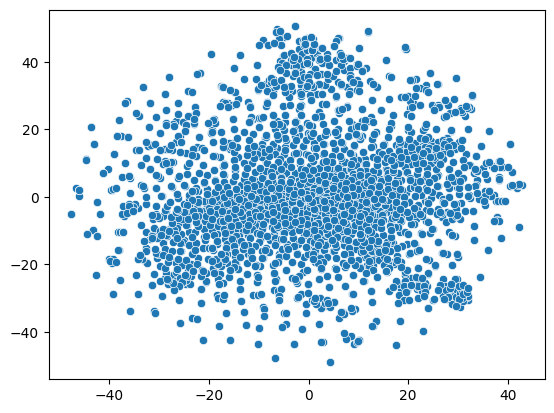

In [ ]:
tsne = TSNE(n_components= 2, learning_rate= 'auto', init= 'random')
X_cv_tsne= tsne.fit_transform(X_cv)
sns.scatterplot(x= X_cv_tsne[:,0], y= X_cv_tsne[:,1])

Direct Apply BERT, GPT2, XLNet on a given text.

In [ ]:
model_bert = Summarizer()

model_gpt2 = TransformerSummarizer(transformer_type = "GPT2", transformer_model_key="gpt2-medium")

model_xlnet = TransformerSummarizer(transformer_type = "XLNet", transformer_model_key = "xlnet-base-cased")

In [ ]:
df['article'][12]
text = 'Putin backs state grab for Yukos  Russia\'s president has defended the purchase of Yukos\' key production unit by state-owned oil firm Rosneft, saying it followed free market principles.  Vladimir Putin said it was quite within the rights of a state-owned company to ensure its interests were met. Rosneft bought 100% of Baikal Finance Group, in a move that amounts to the renationalisation of a major chunk of Russia\'s booming oil industry. Rosneft will now control about 16% of Russia\'s total crude oil output. Yukos share jumped in Moscow, climbing as much as 50% before being suspended.  Rosneft is already in the process of merging with Gazprom, the world\'s biggest gas company, a move that will see Gazprom return to majority state-ownership.  Baikal was the surprise buyer of oil and gas giant Yukos\'s main production division at a forced auction on Sunday. "Everything was done by market methods," Mr Putin said at his year-end press conference in Moscow. Shedding some light on the Kremlin\'s motivation, Mr Putin referred to a period of so-called "cowboy capitalism" that followed the collapse of the Soviet Union.  He said privatisations carried out in the early 1990s had involved trickery, including law breaking, by people seeking to acquire valuable state property. "Now the state, using market methods, is safeguarding its interests. I think this is quite normal," the Russian president said. A Rosneft spokesman has said the acquisition is part of its plan to build a "balanced, national energy corporation."  The latest announcement comes after more than a year of wrangling that has pushed Yukos, one of Russia\'s biggest companies to the brink of collapse. The Russian government put Yukos\'s Yuganskneftegas subsidiary up for sale last week after hitting the company with a $27bn (Â£14bn) bill for back taxes and fines.  Analysts say that Yukos\'s legal attempts to block the auction by filing for bankruptcy protection in the US are probably what caused this week\'s cloak-and-dagger dealings. Gazprom, the company originally tipped to buy Yuganskneftegas, was banned from taking part in the auction by a US court injunction. By selling the Yukos unit to little-known Baikal and then to Rosneft, Russia is able to circumvent a host of tricky legal landmines, analysts said. "You cannot sue the Russian government," said Eric Kraus, a strategist at Moscow\'s Sovlink Securities. "The Russian government has sovereign immunity." "The government is renationalising Yuganskneftegas."  Even so, analysts reckon that the saga still has a long way to go. The Rosneft announcement came just hours after Yukos accused Gazprom of illegally taking part in Sunday\'s auction. It has said it will be seeking damages of $20bn. The claim was made at the latest hearing in the US bankruptcy court in Houston, Texas, where Yukos, had filed for Chapter 11 bankruptcy protection. If found in contempt of the US court order blocking the auction, Gazprom could face having foreign assets seized. Yukos\' lawyers had also been expected to try to have Baikal\'s assets frozen. Lawyers claimed the auction was illegal because Yukos - with an office in Houston - had filed for bankruptcy and therefore its assets were under the protection of US law which has worldwide jurisdiction. Further muddying the waters is a merger between Rosneft and Gazprom which authorities have said will go ahead as planned. '

Summarizes the text using the models.

In [ ]:
summary_1 = ''.join(model_bert(text, min_length=50))
summary_2 = ''.join(model_gpt2(text, min_length=50))
summary_3 = ''.join(model_xlnet(text, min_length=50))

print(f'Summary by {model_bert}:\n\n{summary_1} \n\n')
print(f'Summary by {model_gpt2}:\n\n{summary_2} \n\n')
print(f'Summary by {model_xlnet}:\n\n{summary_3} \n\n')


## Load the MODEL - PEGASUS in this case.

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# mostly it's not available
# Load the pre-trained tokenizer and model
# tokenizer = PegasusTokenizer.from_pretrained('google/bigbird-pegasus-large-arxiv')
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-multi_news")
model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-multi_news').to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-multi_news and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [22]:
device

device(type='cuda')

Constant prolem with google colab

In [ ]:
pip install accelerate -U


In [23]:
import accelerate
print(accelerate.__version__)


0.31.0


In [ ]:
!pip install transformers[torch] --upgrade

In [ ]:
import torch
print(torch.__version__)
# Delete a model
del model

In [28]:
torch.cuda.empty_cache()
import gc
gc.collect()


303

In [29]:
print(torch.cuda.memory_summary())


|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 2            |        cudaMalloc retries: 39        |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   8709 MiB |  22338 MiB |  20219 GiB |  20211 GiB |
|       from large pool |   8705 MiB |  22330 MiB |  18890 GiB |  18881 GiB |
|       from small pool |      4 MiB |     39 MiB |   1329 GiB |   1329 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   8709 MiB |  22338 MiB |  20219 GiB |  20211 GiB |
|       from large pool |   8705 MiB |  22330 MiB |  18890 GiB |

In [52]:
from datasets import load_metric

# Load the ROUGE metric
rouge_metric = load_metric("rouge")

<ipython-input-52-46d42c470235>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = load_metric("rouge")


The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [53]:
# Tokenize the data
def tokenize_data(df):
    model_inputs = tokenizer(df['article'], truncation=True, padding='max_length')
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(df['summary'], truncation=True, padding='max_length')
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Apply the tokenization function
train_dataset = train_dataset.map(tokenize_data, batched=True)
val_dataset = val_dataset.map(tokenize_data, batched=True)
test_dataset = test_dataset.map(tokenize_data, batched=True)

# Set the format for PyTorch
train_dataset.set_format('torch')
val_dataset.set_format('torch')
test_dataset.set_format('torch')


Map:   0%|          | 0/1602 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/178 [00:00<?, ? examples/s]

Map:   0%|          | 0/445 [00:00<?, ? examples/s]

In [46]:
train_dataset

Dataset({
    features: ['article', 'summary', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1602
})

In [ ]:

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./output',
    eval_strategy='epoch',
    learning_rate=5e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    fp16=True,
    num_train_epochs=1,
    torch_compile=True,
    weight_decay=0.01,
    save_total_limit=3,
    save_strategy='epoch',
    dataloader_num_workers=2,
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    remove_unused_columns=True,
    disable_tqdm=True,
    load_best_model_at_end=True,
    metric_for_best_model="rouge2"
)

# all rouge metrics
def compute_metrics(pred):
    # Example metrics using rouge for summarization
    return {
        'rouge1_precision': pred.metrics['rouge1'].precision,
        'rouge1_recall': pred.metrics['rouge1'].recall,
        'rouge1_fmeasure': pred.metrics['rouge1'].fmeasure,
        'rouge2_precision': pred.metrics['rouge2'].precision,
        'rouge2_recall': pred.metrics['rouge2'].recall,
        'rouge2_fmeasure': pred.metrics['rouge2'].fmeasure,
    }

# Initialize the Trainer
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,
# )

# k-fold cross-validation
# kf = KFold(n_splits=6, shuffle=True, random_state=42)

# to do
# X_train = train_df['article_text'].values
# Y_train = train_df['summary_text'].values


def compute_metrics(pred):
    pred_ids = pred.predictions.argmax(-1)
    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids = pred.label_ids
    labels_ids[labels_ids == -100] = tokenizer.pad_token_id
    label_str = tokenizer.batch_decode(labels_ids, skip_special_tokens=True)

    # Compute the ROUGE scores
    rouge_output = rouge_metric.compute(predictions=pred_str, references=label_str, use_stemmer=True)

    return {
        'rouge1_precision': rouge_output['rouge1'].mid.precision,
        'rouge1_recall': rouge_output['rouge1'].mid.recall,
        'rouge1_fmeasure': rouge_output['rouge1'].mid.fmeasure,
        'rouge2_precision': rouge_output['rouge2'].mid.precision,
        'rouge2_recall': rouge_output['rouge2'].mid.recall,
        'rouge2_fmeasure': rouge_output['rouge2'].mid.fmeasure,
        'rougeL_precision': rouge_output['rougeL'].mid.precision,
        'rougeL_recall': rouge_output['rougeL'].mid.recall,
        'rougeL_fmeasure': rouge_output['rougeL'].mid.fmeasure,
    }


def train_fold(train_dataset, val_dataset):
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )
    trainer.train()
    return trainer
# train_fold(train_dataset, val_dataset)
trainer = train_fold(train_dataset, val_dataset)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [ ]:
result = trainer.evaluate(eval_dataset=test_dataset)
print(f"Final evaluation: {result}")

Total params

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
total_params

## RoUGE scores for evaluation

In [ ]:
# Compute ROUGE scores
rouge_results = trainer.compute_metrics(result)
print(f"ROUGE scores on test set:")
print(f"ROUGE-1 Precision: {rouge_results['rouge1_precision']}")
print(f"ROUGE-1 Recall: {rouge_results['rouge1_recall']}")
print(f"ROUGE-1 F-measure: {rouge_results['rouge1_fmeasure']}")
print(f"ROUGE-2 Precision: {rouge_results['rouge2_precision']}")
print(f"ROUGE-2 Recall: {rouge_results['rouge2_recall']}")
print(f"ROUGE-2 F-measure: {rouge_results['rouge2_fmeasure']}")

## Gradio Interface

In [ ]:

def summarize_article(article):

    inputs = tokenizer(article, return_tensors="pt", max_length=2048, truncation=True)

    # model generates the summary
    summary_ids = model.generate(inputs['input_ids'].to(device))

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

article_input = gr.Textbox(lines=10, label="Input article")
summarize_button = gr.Button(text="Summarize")

gr.Interface(
    fn=summarize_article,
    inputs=article_input,
    outputs=gr.Textbox(label="Summary", lines=12),
    title="Text Summarization",
    description="Paste and click Summarize",
    theme="compact"
).launch()


Using Model- T5 [Link](https://huggingface.co/docs/transformers/en/model_doc/t5)

In [ ]:
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    TrainingArguments,
    Trainer
)

In [ ]:
device = "cpu"

In [ ]:
t5_tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")
model.to(device)
# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")


In [ ]:
rouge = evaluate.load("rouge")

In [ ]:
# Training arguments (modify as per your requirements)
training_args = TrainingArguments(
    output_dir='./output',
    evaluation_strategy='epoch',
    learning_rate=1e-4,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=3,
    warmup_steps=500,
    save_steps=500,
    save_strategy='epoch',
    remove_unused_columns=False,
    disable_tqdm=False,
    load_best_model_at_end=True,
    metric_for_best_model="rouge2"
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate on test set
test_result = trainer.evaluate(eval_dataset=test_dataset)
print(f"Final evaluation result on test set: {test_result}")